No handles with labels found to put in legend.


   Arrival Time  Placement Time 1  Removal Time 1 Platelets Extraction  \
0             0          5.581129        5.968571              42.1771   
1       5503.07          4.711386        5.316821              38.6581   
2       5506.99          4.888863        3.765040              47.4256   
3       5510.26          3.329494        3.317677              41.6377   
4       5494.55          5.138557        3.874003              44.2263   
5       5498.93          3.936709        4.772046              35.2444   
6       5485.85          3.345513        5.698733              34.8403   
7       5495.77          5.540164        3.264388              44.5468   
8       5504.96          4.920339        5.398349              37.2165   
9       5495.65          3.932188        5.547050              41.9497   
10      5490.41          4.429373        5.746338              36.4933   
11       5496.9          5.279566        5.303976              47.7989   
12      5508.08          5.522689     

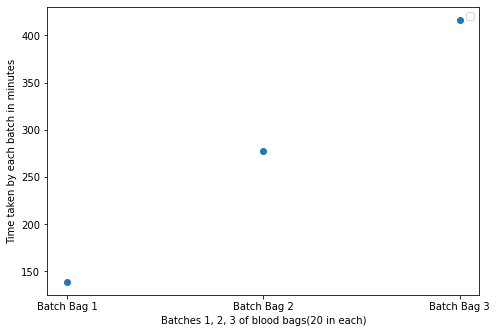

No handles with labels found to put in legend.


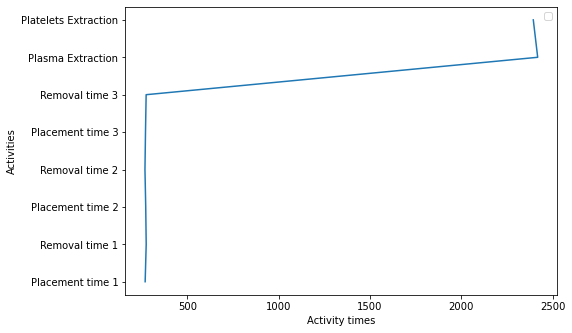

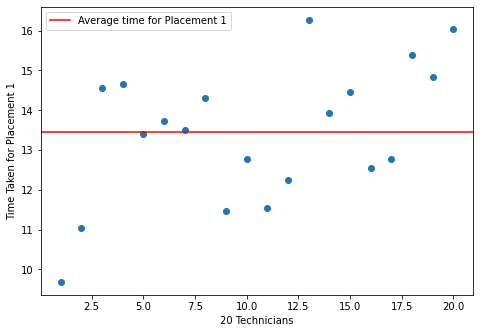

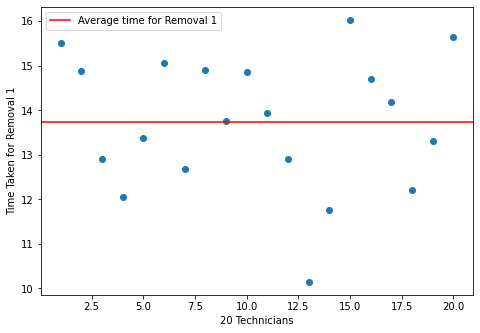

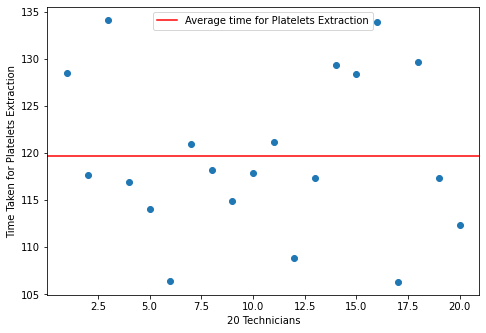

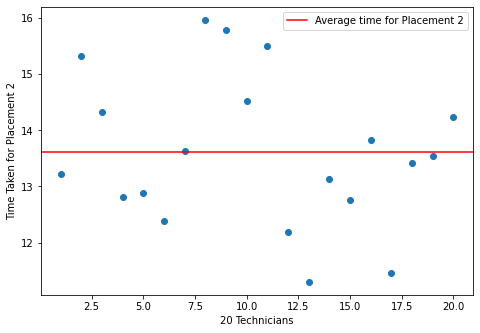

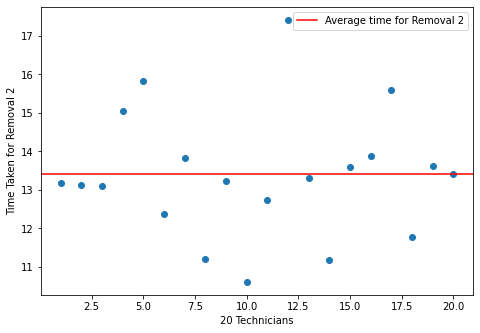

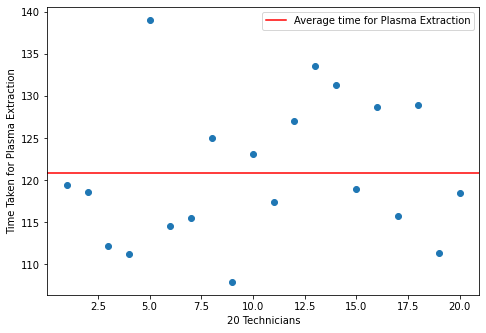

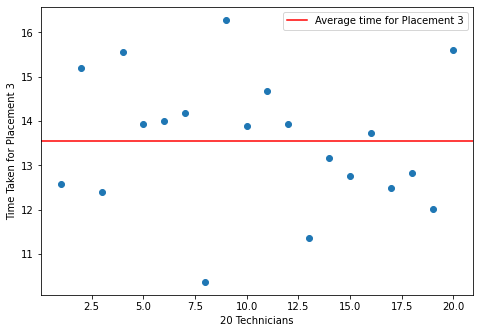

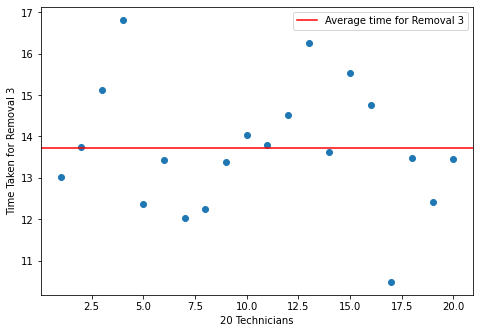

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randrange



technicians = np.zeros((20, 8))
centrifuge_platelets = 300
centrifuge_plasma = 480
testing = 5400
total_time_elapsed = 0
TAT = []
plotlist = []
totaltimelist = []





j = 0
k = 0
p1 = r1 = p2 = r2 = r3 = p3 = r2 = ps1 = pl1 = 0

def makingbags():
    
    df = pd.DataFrame(columns = ["Arrival Time", "Placement Time 1", "Removal Time 1", "Platelets Extraction", "Placement Time 2", "Removal Time 2", "Plasma Extraction", "Placement Time 3", "Removal Time 3", "Disease Detected", "Total Service Time"])

    df["Placement Time 1"] = abs(np.random.uniform(low = 3, high = 6, size = 20))
    df["Removal Time 1"] = abs(np.random.uniform(low = 3, high = 6, size = 20))

    df["Placement Time 2"] = abs(np.random.uniform(low = 3, high = 6, size = 20))
    df["Removal Time 2"] = abs(np.random.uniform(low = 3, high = 6, size = 20))
    
    df["Placement Time 3"] = abs(np.random.uniform(low = 3, high = 6, size = 20))
    df["Removal Time 3"] = abs(np.random.uniform(low = 3, high = 6, size = 20))
    return df


    
def makinglist():
    randtech = []
    for i in range(20):
        randtech.append(i)
    return randtech

for c in range(20):
    plotlist.append(c+1)
    
    

for count in range(3):
    randlist = []
    df = makingbags()
    
    for x in range(20):
        while (j < 30 or j > 50):
            j = np.random.normal(loc = 40, scale = 5, size = 1)
        while (k < 30 or k > 50):
            k = np.random.normal(loc = 40, scale = 5, size = 1)
        df.loc[x, "Platelets Extraction"] = j
        df.loc[x, "Plasma Extraction"] = k
        j = 0
        k = 0
    
    for b in range(8):
        newli = makinglist()
        random.shuffle(newli)
        randlist.append(newli)
        

    processes = 0
    for i in range(20):
        if i == 0:
            df.loc[i, "Arrival Time"] = 0
            df.loc[i, "Total Service Time"] = df.loc[i, "Placement Time 1"] + df.loc[i, "Removal Time 1"] + df.loc[i, "Platelets Extraction"] + df.loc[i, "Placement Time 2"] + df.loc[i, "Removal Time 2"] + df.loc[i, "Plasma Extraction"] + testing 
            s = randlist[0].pop(0)
            technicians[s][0] = technicians[s][0] + df.loc[i, "Placement Time 1"]
            processes = processes + df.loc[i, "Placement Time 1"]
            p1 = p1 + df.loc[i, "Placement Time 1"]
            s = randlist[1].pop(0)
            technicians[s][1] = technicians[s][1] + df.loc[i, "Removal Time 1"]
            processes = processes + df.loc[i, "Removal Time 1"]
            r1 = r1 + df.loc[i, "Removal Time 1"]
            s = randlist[2].pop(0)
            technicians[s][2] = technicians[s][2] + df.loc[i, "Platelets Extraction"]
            processes = processes + df.loc[i, "Platelets Extraction"]
            pl1 = pl1 + df.loc[i, "Platelets Extraction"]
            s = randlist[3].pop(0)
            technicians[s][3] = technicians[s][3] + df.loc[i, "Placement Time 2"]
            processes = processes + df.loc[i, "Placement Time 2"]
            p2 = p2 + df.loc[i, "Placement Time 2"]
            s = randlist[4].pop(0)
            technicians[s][4] = technicians[s][4] + df.loc[i, "Removal Time 2"]
            processes = processes + df.loc[i, "Removal Time 2"]
            r2 = r2 + df.loc[i, "Removal Time 2"]
            s = randlist[5].pop(0)
            technicians[s][5] = technicians[s][5] + df.loc[i, "Plasma Extraction"]
            processes = processes + df.loc[i, "Plasma Extraction"]
            ps1 = ps1 + df.loc[i, "Plasma Extraction"] 
            s = randlist[6].pop(0)
            technicians[s][6] = technicians[s][6] + df.loc[i, "Placement Time 3"]
            processes = processes + df.loc[i, "Placement Time 3"]
            p3 = p3 + df.loc[i, "Placement Time 3"]
            s = randlist[7].pop(0)
            technicians[s][7] = technicians[s][7] + df.loc[i, "Removal Time 3"]
            processes = processes + df.loc[i, "Removal Time 3"]
            r3 = r3 + df.loc[i, "Removal Time 3"]
            
        else:
            df.loc[i, "Arrival Time"] = df.loc[i - 1, "Total Service Time"]
            df.loc[i, "Total Service Time"] = df.loc[i, "Placement Time 1"] + df.loc[i, "Removal Time 1"] + df.loc[i, "Platelets Extraction"] + df.loc[i, "Placement Time 2"] + df.loc[i, "Removal Time 2"] + df.loc[i, "Plasma Extraction"] + testing
            s = randlist[0].pop(0)
            technicians[s][0] = technicians[s][0] + df.loc[i, "Placement Time 1"]
            processes = processes + df.loc[i, "Placement Time 1"]
            p1 = p1 + df.loc[i, "Placement Time 1"]
            s = randlist[1].pop(0)
            technicians[s][1] = technicians[s][1] + df.loc[i, "Removal Time 1"]
            processes = processes + df.loc[i, "Removal Time 1"]
            r1 = r1 + df.loc[i, "Removal Time 1"]
            s = randlist[2].pop(0)
            technicians[s][2] = technicians[s][2] + df.loc[i, "Platelets Extraction"]
            processes = processes + df.loc[i, "Platelets Extraction"]
            pl1 = pl1 + df.loc[i, "Platelets Extraction"]
            s = randlist[3].pop(0)
            technicians[s][3] = technicians[s][3] + df.loc[i, "Placement Time 2"]
            processes = processes + df.loc[i, "Placement Time 2"]
            p2 = p2 + df.loc[i, "Placement Time 2"]
            s = randlist[4].pop(0)
            technicians[s][4] = technicians[s][4] + df.loc[i, "Removal Time 2"]
            processes = processes + df.loc[i, "Removal Time 2"]
            r2 = r2 + df.loc[i, "Removal Time 2"]
            s = randlist[5].pop(0)
            technicians[s][5] = technicians[s][5] + df.loc[i, "Plasma Extraction"]
            processes = processes + df.loc[i, "Plasma Extraction"]
            ps1 = ps1 + df.loc[i, "Plasma Extraction"] 
            s = randlist[6].pop(0)
            technicians[s][6] = technicians[s][6] + df.loc[i, "Placement Time 3"]
            processes = processes + df.loc[i, "Placement Time 3"]
            p3 = p3 + df.loc[i, "Placement Time 3"]
            s = randlist[7].pop(0)
            technicians[s][7] = technicians[s][7] + df.loc[i, "Removal Time 3"]
            processes = processes + df.loc[i, "Removal Time 3"]
            r3 = r3 + df.loc[i, "Removal Time 3"]

        
    time_elapsed = processes + centrifuge_platelets + centrifuge_plasma + testing + total_time_elapsed
    totaltimelist.append(time_elapsed)
    for a in range(20):
        ran = random.randint(1,2)
        TAT.append(df.loc[a, "Total Service Time"] + processes + centrifuge_platelets + centrifuge_plasma + total_time_elapsed)
        if (ran == 1):
            df.loc[a, "Disease Detected"] = "Hepatitis A"
        else:
            df.loc[a, "Disease Detected"] = "Hepatitis B"
    total_time_elapsed = time_elapsed
    print(df)
    print("Time elapsed for batch " + str(count + 1))
    print(time_elapsed/60)
    


        
print("Time elapsed since arrival " + str(time_elapsed / 60) + " minutes")
#print("Time taken by each indiviual technician for performing activities ")
for j in range(60):
    print("Turnaround time for bag " + str(j + 1) + " " + str(TAT[j]/60))
    
    
print("Turnaround time for Placement time 1 " + str(p1))
print("Turnaround time for Placement time 2 " + str(p2))
print("Turnaround time for Placement time 3 " + str(p3))
print("Turnaround time for Removal time 1 " + str(r1))
print("Turnaround time for Removal time 2 " + str(r2))
print("Turnaround time for Removal time 3 " + str(r3))
print("Turnaround time for Platelets Extraction " + str(pl1))
print("Turnaround time for Plasma Extraction " + str(ps1))
#print(technicians)

dict1 = {}
dict1["Placement time 1"] = p1
dict1["Removal time 1"] = r1
dict1["Placement time 2"] = p2
dict1["Removal time 2"] = r2
dict1["Placement time 3"] = p3
dict1["Removal time 3"] = r3
dict1["Plasma Extraction"] = ps1
dict1["Platelets Extraction"] = pl1

totaltimelist[0] = totaltimelist[0] / 60
totaltimelist[1] = totaltimelist[1] / 60
totaltimelist[2] = totaltimelist[2] / 60
TATlist = ["Batch Bag 1", "Batch Bag 2", "Batch Bag 3"]

for i in range(3):
    print("Time taken by each batch " + str(totaltimelist[i]))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.scatter(TATlist, totaltimelist)
plt.xlabel('Batches 1, 2, 3 of blood bags(20 in each)')
plt.ylabel('Time taken by each batch in minutes')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.plot(dict1.values(), dict1.keys())
plt.xlabel('Activity times')
plt.ylabel('Activities')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.axhline(y = p1/20, color='r', linestyle='-', label = "Average time for Placement 1")
plt.scatter(plotlist, technicians[:,0])
plt.xlabel('20 Technicians')
plt.ylabel('Time Taken for Placement 1')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.axhline(y = r1/20, color='r', linestyle='-', label = "Average time for Removal 1")
plt.scatter(plotlist, technicians[:,1])
plt.xlabel('20 Technicians')
plt.ylabel('Time Taken for Removal 1')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.axhline(y = pl1/20, color='r', linestyle='-', label = "Average time for Platelets Extraction")
plt.scatter(plotlist, technicians[:,2])
plt.xlabel('20 Technicians')
plt.ylabel('Time Taken for Platelets Extraction')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.axhline(y = p2/20, color='r', linestyle='-', label = "Average time for Placement 2")
plt.scatter(plotlist, technicians[:,3])
plt.xlabel('20 Technicians')
plt.ylabel('Time Taken for Placement 2')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.axhline(y = r2/20, color='r', linestyle='-', label = "Average time for Removal 2")
plt.scatter(plotlist, technicians[:,4])
plt.xlabel('20 Technicians')
plt.ylabel('Time Taken for Removal 2')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.axhline(y = ps1/20, color='r', linestyle='-', label = "Average time for Plasma Extraction")
plt.scatter(plotlist, technicians[:,5])
plt.xlabel('20 Technicians')
plt.ylabel('Time Taken for Plasma Extraction')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.axhline(y = p3/20, color='r', linestyle='-', label = "Average time for Placement 3")
plt.scatter(plotlist, technicians[:,6])
plt.xlabel('20 Technicians')
plt.ylabel('Time Taken for Placement 3')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.axhline(y = r3/20, color='r', linestyle='-', label = "Average time for Removal 3")
plt.scatter(plotlist, technicians[:,7])
plt.xlabel('20 Technicians')
plt.ylabel('Time Taken for Removal 3')
plt.legend()
plt.show()





#print(technicians[:,5])
    